In [1]:
import numpy as np
import pandas as pd

In [135]:
import re

In [2]:
data_path = "/data/kaggleData/2sigma/"

pic_file = data_path + "listing_image_time.csv"
pic_df = pd.read_csv(pic_file).set_index('Listing_Id')

train_df = pd.read_json(data_path + 'train.json')
test_df = pd.read_json(data_path+'test.json')

train_df=train_df.join(pic_df,on='listing_id',how='left')
test_df=test_df.join(pic_df,on='listing_id',how='left')

train_df.to_json(data_path + "train_t.json")
test_df.to_json(data_path + "test_t.json")

In [89]:
print len(train_df)
print len(test_df)

49352
74659


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
temp_train = pd.DataFrame(train_df,copy = True)
temp_test = pd.DataFrame(test_df,copy = True)
temp_train['from'] = 'train'
temp_test['from'] = 'test'
train_test = pd.concat([temp_train.drop('interest_level',axis = 1),temp_test])

In [75]:
train_low = np.sum(train_df['interest_level']=='low')*1.0/len(train_df)
train_med = np.sum(train_df['interest_level']=='medium')*1.0/len(train_df)
train_hi = np.sum(train_df['interest_level']=='high')*1.0/len(train_df)
print 'The label distribution in the train set(low,medium,high) is'
print train_low,train_med,train_hi

The label distribution in the train set(low,medium,high) is
0.694683092884 0.227528772897 0.0777881342195


## Numerical feature exploring

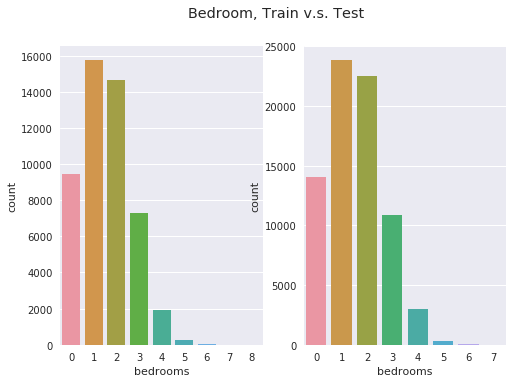

In [22]:
#bathroom distribution in train and test
plt.subplot(121)
sns.plt.suptitle('Bedroom, Train v.s. Test')
#sns.countplot(x='bedrooms', hue='from', data=train_test)
sns.countplot(x='bedrooms',  data=train_df)
plt.subplot(122)
sns.countplot(x='bedrooms',  data=test_df)
plt.show()

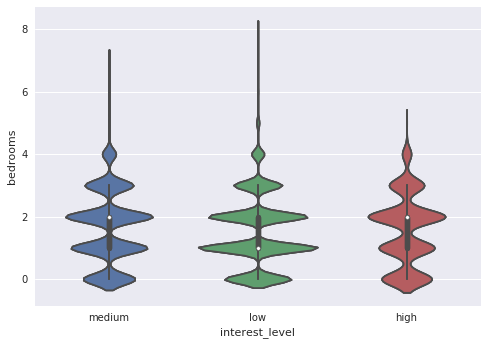

In [15]:
#bathrooms and bedrooms
sns.violinplot(x = 'interest_level',y ='bedrooms' ,data = train_df)
plt.show()

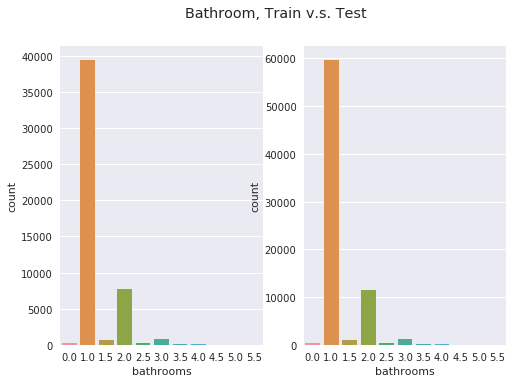

In [27]:
#bathroom distribution in train and test
plt.subplot(121)
sns.plt.suptitle('Bathroom, Train v.s. Test')
#sns.countplot(x='bedrooms', hue='from', data=train_test)
sns.countplot(x='bathrooms',  data=train_df[train_df['bathrooms']<6])
plt.subplot(122)
sns.countplot(x='bathrooms',  data=test_df[test_df['bathrooms']<6])
plt.show()

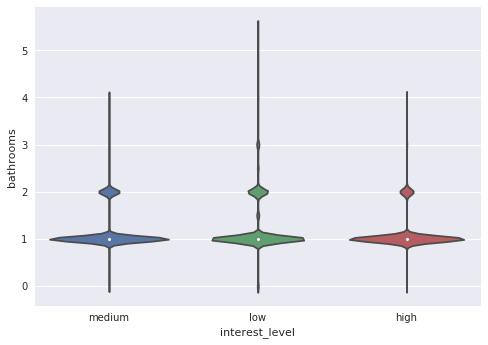

In [29]:
#bathrooms and bedrooms
sns.violinplot(x = 'interest_level',y ='bathrooms' ,data = train_df[train_df['bathrooms']<6])
plt.show()

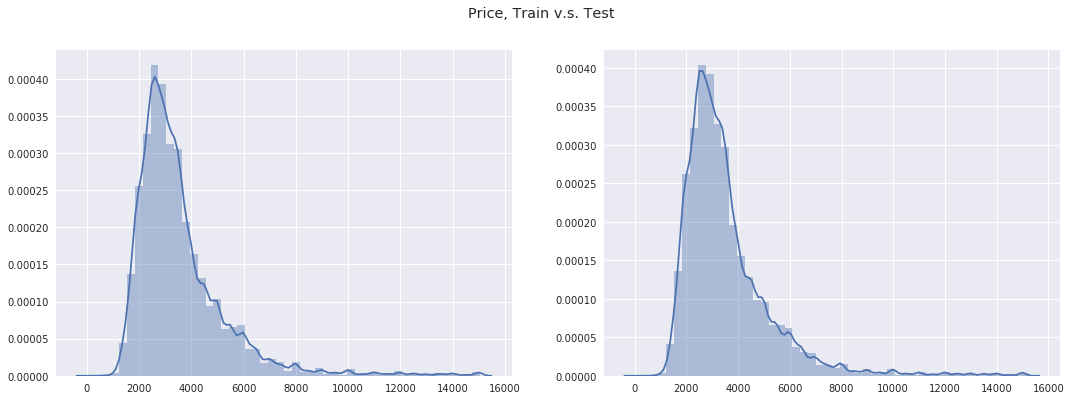

In [46]:
high = np.percentile(train_df.price.values, 99.5)

#price distribution
#bathroom distribution in train and test
plt.figure(figsize=(18, 6))

plt.subplot(121)
sns.plt.suptitle('Price, Train v.s. Test')
#sns.countplot(x='bedrooms', hue='from', data=train_test)
sns.distplot(a=train_df.ix[train_df['price']<high,'price'].values,bins = 50)
plt.subplot(122)
sns.distplot(a=test_df.ix[test_df['price']<high,'price'].values,bins = 50)
plt.show()

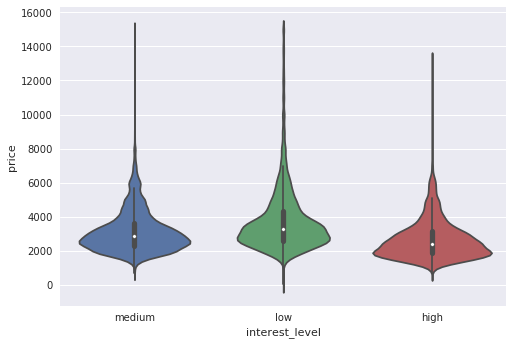

In [48]:
#bathrooms and bedrooms
sns.violinplot(x = 'interest_level',y ='price' ,data = train_df[train_df['price']<high])
plt.show()

In [53]:
train_df["price_per_room"] = ((train_df["price"]+1e-7)/(train_df["bedrooms"]+train_df["bathrooms"]+1e-7))


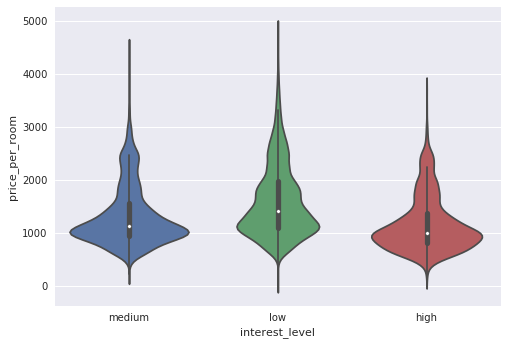

In [72]:
high_per_bed = np.percentile(train_df['price_per_room'],99.5)
#bathrooms and bedrooms
sns.violinplot(x = 'interest_level',y ='price_per_room' ,data = train_df[train_df['price_per_room']<high_per_bed])
plt.show()

## Spatial features

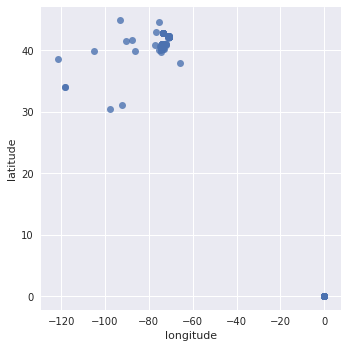

In [59]:
sns.lmplot(x = 'longitude',
           y = 'latitude',
           data = train_test,
           fit_reg = False
          )
plt.show()

In [60]:
processed_train = pd.read_json(data_path + 'processed_train.json')
processed_test = pd.read_json(data_path+'processed_test.json')

In [61]:
temp_train = pd.DataFrame(processed_train,copy = True)
temp_test = pd.DataFrame(processed_test,copy = True)
temp_train['from'] = 'train'
temp_test['from'] = 'test'
processed_train_test = pd.concat([temp_train.drop('interest_level',axis = 1),temp_test])

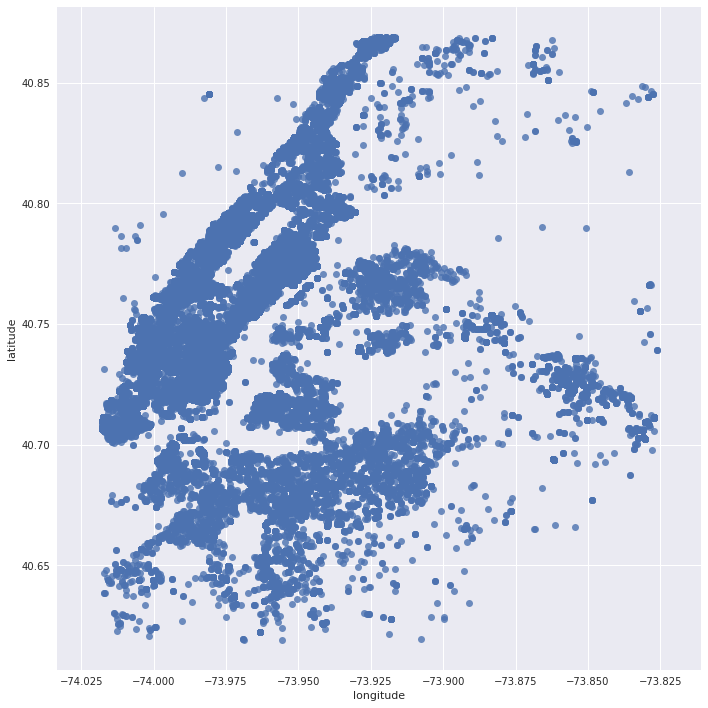

In [67]:
#plt.figure(figsize=(15,8))

sns.lmplot(x = 'longitude',
           y = 'latitude',
           data = processed_train_test[['longitude','latitude']].replace(-1,np.nan).dropna(),
           fit_reg = False,
           size = 10,
           
          )
plt.show()

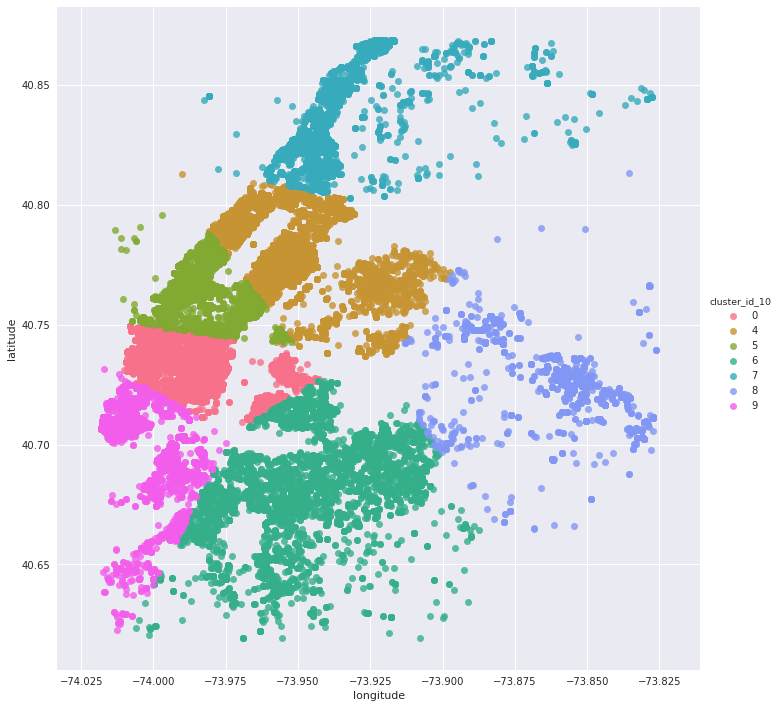

In [70]:
sns.lmplot(x = 'longitude',
           y = 'latitude',
           data = processed_train_test[['longitude','latitude','cluster_id_10',
                                       'cluster_id_30']].replace(-1,np.nan).dropna(),
           hue ='cluster_id_10',
           fit_reg = False,
           size = 10,
           
          )
plt.show()

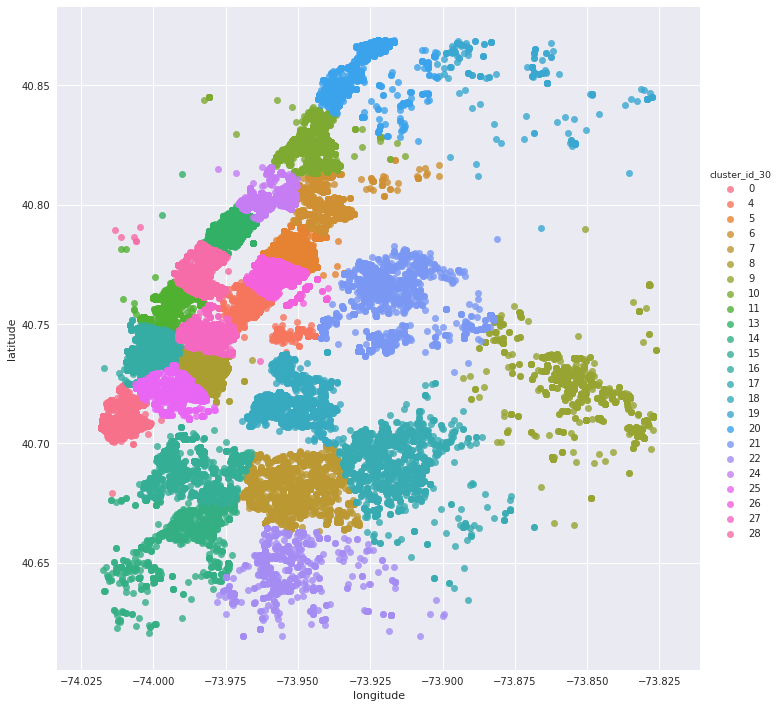

In [71]:
sns.lmplot(x = 'longitude',
           y = 'latitude',
           data = processed_train_test[['longitude','latitude','cluster_id_10',
                                       'cluster_id_30']].replace(-1,np.nan).dropna(),
           hue ='cluster_id_30',
           fit_reg = False,
           size = 10,
           
          )
plt.show()

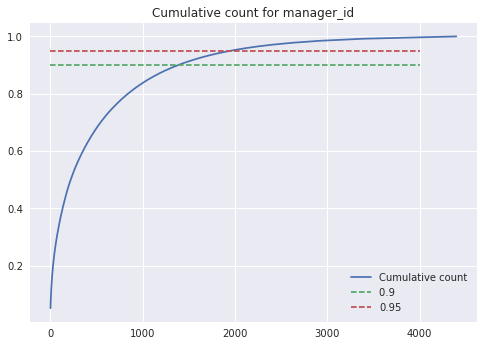

In [104]:
manager_cumsum = train_test['manager_id'].value_counts().cumsum()*1.0/len(train_test)
plot_manager_cumsum = pd.DataFrame()
plot_manager_cumsum['value'] = manager_cumsum
plot_manager_cumsum['index'] = range(len(manager_cumsum))

plt.plot(plot_manager_cumsum['index'] ,plot_manager_cumsum['value'],label = 'Cumulative count')
plt.plot([0,4000],[0.9,0.9], linestyle='--',label='0.9 ')
plt.plot([0,4000],[0.95,0.95], linestyle='--',label = '0.95')
plt.legend()
plt.title('Cumulative count for manager_id')
plt.show()

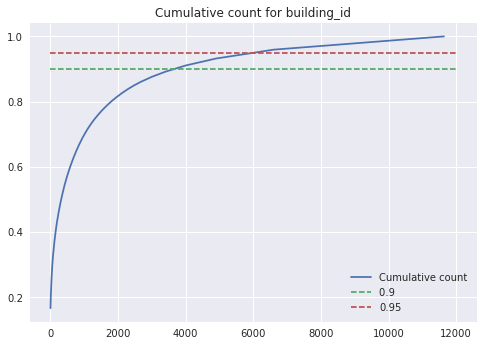

In [106]:
building_cumsum = train_test['building_id'].value_counts().cumsum()*1.0/len(train_test)
plot_building_cumsum = pd.DataFrame()
plot_building_cumsum['value'] = building_cumsum
plot_building_cumsum['index'] = range(len(building_cumsum))

plt.plot(plot_building_cumsum['index'] ,plot_building_cumsum['value'],label = 'Cumulative count')
plt.plot([0,12000],[0.9,0.9], linestyle='--',label='0.9 ')
plt.plot([0,12000],[0.95,0.95], linestyle='--',label = '0.95')
plt.legend()
plt.title('Cumulative count for building_id')
plt.show()

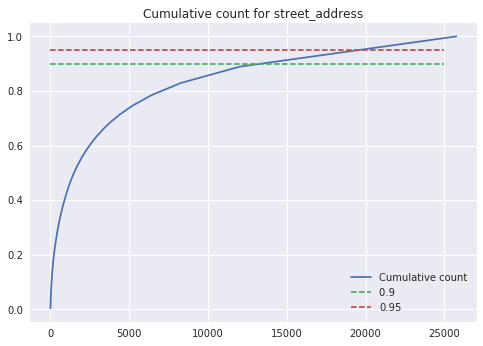

In [108]:
street_cumsum = train_test['street_address'].value_counts().cumsum()*1.0/len(train_test)
plot_street_cumsum = pd.DataFrame()
plot_street_cumsum['value'] = street_cumsum
plot_street_cumsum['index'] = range(len(street_cumsum))

plt.plot(plot_street_cumsum['index'] ,plot_street_cumsum['value'],label = 'Cumulative count')
plt.plot([0,25000],[0.9,0.9], linestyle='--',label='0.9 ')
plt.plot([0,25000],[0.95,0.95], linestyle='--',label = '0.95')
plt.legend()
plt.title('Cumulative count for street_address')
plt.show()

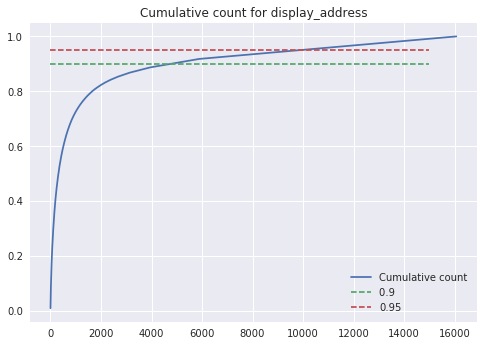

In [110]:
display_cumsum = train_test['display_address'].value_counts().cumsum()*1.0/len(train_test)
plot_display_cumsum = pd.DataFrame()
plot_display_cumsum['value'] = display_cumsum
plot_display_cumsum['index'] = range(len(display_cumsum))

plt.plot(plot_display_cumsum['index'] ,plot_display_cumsum['value'],label = 'Cumulative count')
plt.plot([0,15000],[0.9,0.9], linestyle='--',label='0.9 ')
plt.plot([0,15000],[0.95,0.95], linestyle='--',label = '0.95')
plt.legend()
plt.title('Cumulative count for display_address')
plt.show()

In [ ]:
features_count_in_train = train_test["features"].apply(pd.Series).unstack().reset_index(drop = True).dropna().value_counts()

In [124]:
unique_feat_size = len(features_count_in_train)

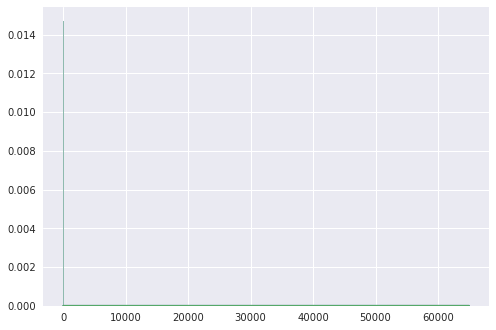

In [118]:
sns.distplot(features_count_in_train,bins = 1000)
plt.show()

In [131]:
print 0.1*train_test.shape[0]
print np.sum(features_count_in_train>0.1*train_test.shape[0])

12401.1
14


In [137]:
for thing in processed_train_test.columns:
    if re.match(r'num',thing):
        print thing

num_description_words
num_features
num_photos


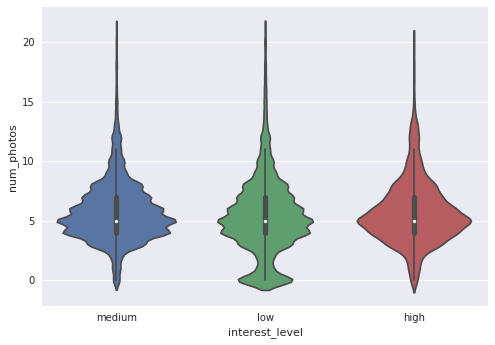

In [141]:
high_num_room = np.percentile(processed_train['num_photos'],99.5)
#bathrooms and bedrooms
sns.violinplot(x = 'interest_level',y ='num_photos' ,data = processed_train[processed_train['num_photos']<high_num_room])
plt.show()